Import stuff
Create camera
Read from camera
Image captured
Save image
Release camera


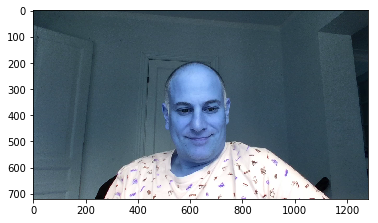

In [1]:
%matplotlib inline
print("Import stuff")
import numpy as np
import cv2
import face_recognition
from matplotlib.pyplot import imshow 
import imageio


print("Create camera")
cam = cv2.VideoCapture(0)

# Capture frame-by-frame
print("Read from camera")
ret, frame = cam.read()

# Our operations on the frame come here
#frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

print("Image captured")
imshow(frame)

name = input("What is your name? ")

print("Save image")
fname = "{}.jpg".format(name)
imageio.imwrite(fname, frame)

print("Release camera")
cam.release()

#print("Find and list faces")
#for i, face in enumerate(face_recognition.face_encodings(frame)):
#    print("Found face {}".format(i))



In [1]:
import face_recognition
import cv2
import glob

# This is a demo of running face recognition on live video from your webcam. It's a little more complicated than the
# other example, but it includes some basic performance tweaks to make things run a lot faster:
#   1. Process each video frame at 1/4 resolution (though still display it at full resolution)
#   2. Only detect faces in every other frame of video.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

known_face_encodings = []
known_face_names = []

print("Loading faces")
for fname in glob.glob('*.jpg'):
    
    img = face_recognition.load_image_file(fname)
    name = fname[:-4].title()
    enc = face_recognition.face_encodings(img)[0]
    known_face_encodings.append(enc)
    known_face_names.append(name)
    print("- Loaded {}".format(name))

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # If a match was found in known_face_encodings, just use the first one.
            if True in matches:
                first_match_index = matches.index(True)
                name = known_face_names[first_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
print('Terminated')
video_capture.release()
cv2.destroyAllWindows()

Loading faces
- Loaded Kostas
- Loaded Hong
Terminated
